<a href="https://colab.research.google.com/github/vivek16pawar/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title : Seoul Bike Sharing Demand Prediction 


## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Importing Library and connecting drive

In [ ]:
# Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Overview of the dataset 

In [ ]:
# Loading dataset

df =pd.read_csv('/content/drive/MyDrive/Module 4/Bike Sharing Demand/SeoulBikeData.csv',encoding = 'latin')

In [ ]:
# Overview of Dataset
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Summery of the dataset
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Checking for null values
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking for any duplicate values
df.duplicated().sum()

0

In [ ]:
# Renaning the columns
df.rename({"Temperature(°C)": "Temperature",  
"Functioning Day":"Functioning_Day",
"Humidity(%)": "Humidity",  
"Wind speed (m/s)": "Wind_speed",
"Visibility (10m)": "Visibility",
"Dew point temperature(°C)": "Dew_point_temperature",
"Solar Radiation (MJ/m2)": "Solar_Radiation",
"Snowfall (cm)": "Snowfall",
"Rainfall(mm)": "Rainfall",
"Rented Bike Count": "Rented_Bike_Count"},  
axis = "columns", inplace = True) 


# Exploratory Data Analysis

In [ ]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Date column
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
8755    30/11/2018
8756    30/11/2018
8757    30/11/2018
8758    30/11/2018
8759    30/11/2018
Name: Date, Length: 8760, dtype: object

In [ ]:
# Importing datetime libary
import datetime

In [ ]:
# Check date column type
type(df['Date'][0])

str

In [ ]:
# Convert date column to int

def convert(date_time):
    format = '%d/%m/%Y' 
    datetime_str = datetime.datetime.strptime(date_time, format)
 
    return datetime_str

In [ ]:
# Apply function to convert
df['Date'] = df['Date'].apply(convert)

In [ ]:
# Which years data is about
df['year'] = df['Date'].dt.year
df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

- 90% of the data is from 2018 and 10% from 2017

In [ ]:
# Rented_Bike_Count
df['Rented_Bike_Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented_Bike_Count, Length: 2166, dtype: int64

In [ ]:
# On which hours comapnies operates
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

- Comapny opeartes nonstop

In [ ]:
# Holidays
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

- There should be weekly offs for this service we have to confirm this

In [ ]:
# Functioning_Days
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

- Most of the time its functioning day

In [ ]:
# Seasons in which it operates
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

There are total 4 seasons

**Outcome of the Univarate Analysis**

- 90% of the data is from 2018 and 10% from 2017
- Comapny opeartes Nonstop
- There should be weekly offs for this service we have to confirm this
- Most of the time its functioning day
- There are total 4 seasons



In [ ]:
# Peak hours for bike renting
hours_rent_count = df['Rented_Bike_Count'].groupby(df['Hour']).sum().sort_values(ascending = False).reset_index()

Text(0.5, 1.0, 'Histogram of number of bike rented per hours')

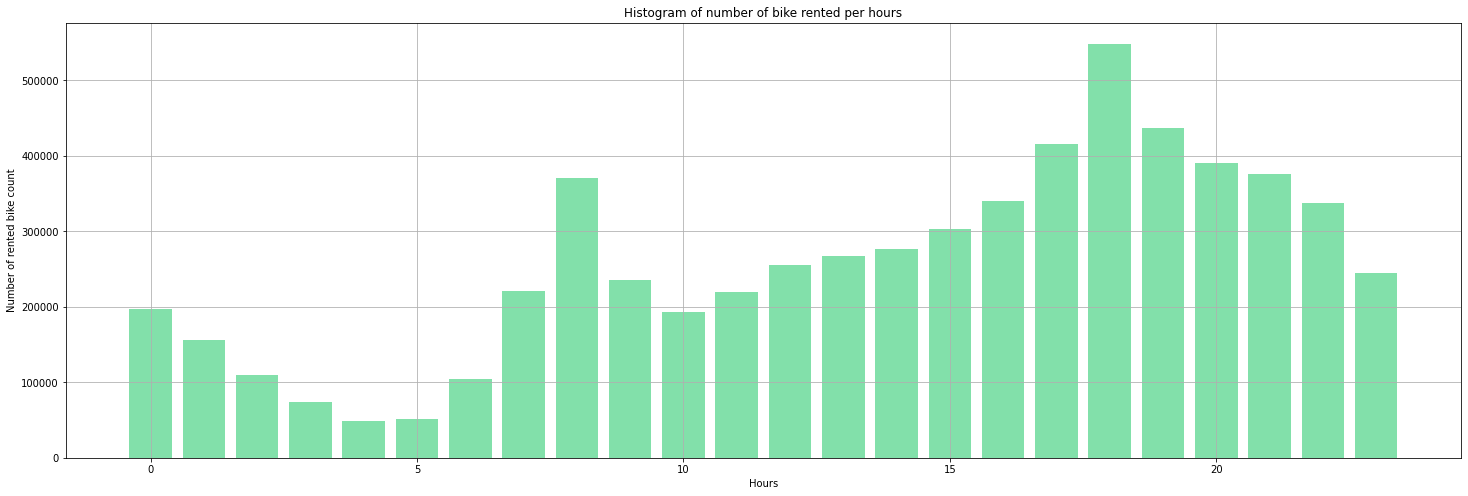

In [ ]:
# Histogram of Number of votes 
plt.figure(figsize = (25,8))
c= '#82E0AA'
plt.bar(x = hours_rent_count['Hour'], height = hours_rent_count['Rented_Bike_Count'],color = c);
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of rented bike count')
plt.title('Histogram of number of bike rented per hours')

- 16 hour to 23 hour is the peak time for bike rent

In [ ]:
# Rented bike count in each year
df['Rented_Bike_Count'].groupby(df['year']).sum()

year
2017     185330
2018    5986984
Name: Rented_Bike_Count, dtype: int64

Text(0, 0.5, 'Counts')

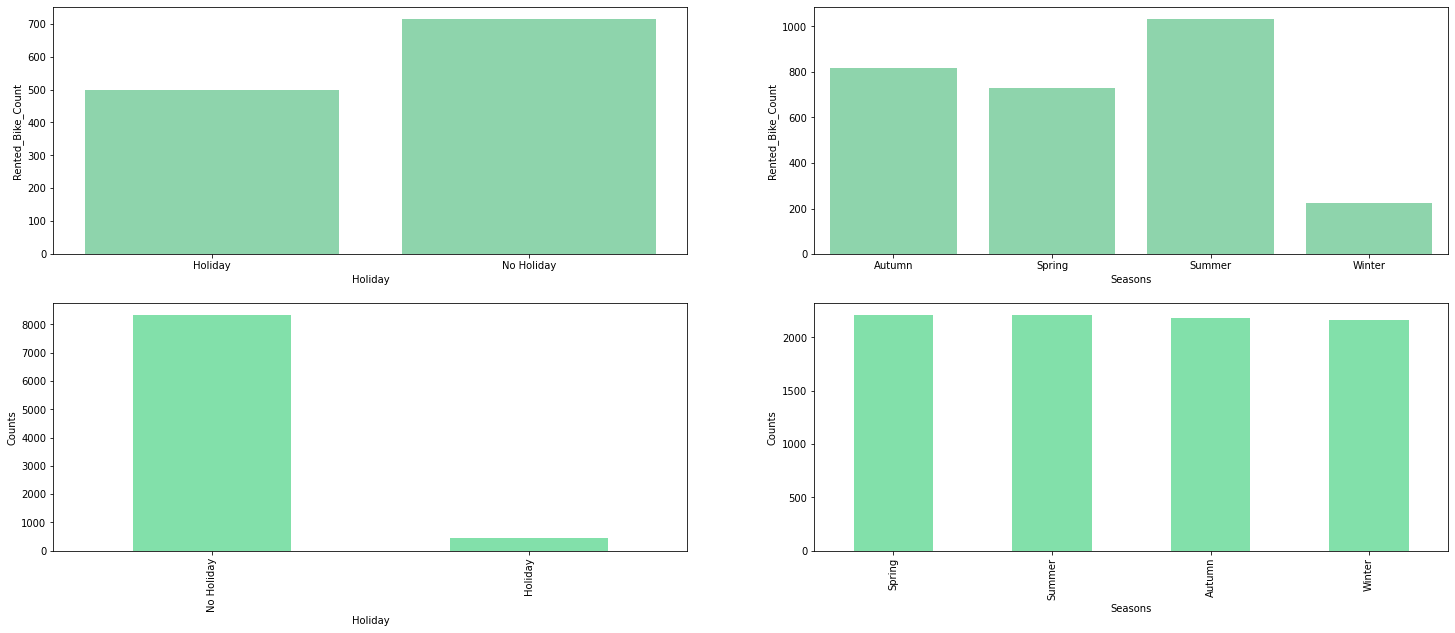

In [ ]:
Holiday_rent = pd.DataFrame(df.groupby('Holiday').agg({'Rented_Bike_Count':'mean'}))
Season_rent = pd.DataFrame(df.groupby('Seasons').agg({'Rented_Bike_Count':'mean'}))

# Bike rents in Seasons and holidays
c= '#82E0AA'
fig, ax = plt.subplots(2,2,figsize=(25,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented_Bike_Count'],color = c)
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented_Bike_Count'],color = c)

# How many Total Seasons and Holidays
ax1=plt.subplot(2, 2,3)
df['Holiday'].value_counts().plot(kind='bar',color = c)
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
df['Seasons'].value_counts().plot(kind='bar',color = c)
plt.xlabel('Seasons')
plt.ylabel('Counts')


Text(0.5, 1.0, 'Rented_Bike_Count vs Temperature')

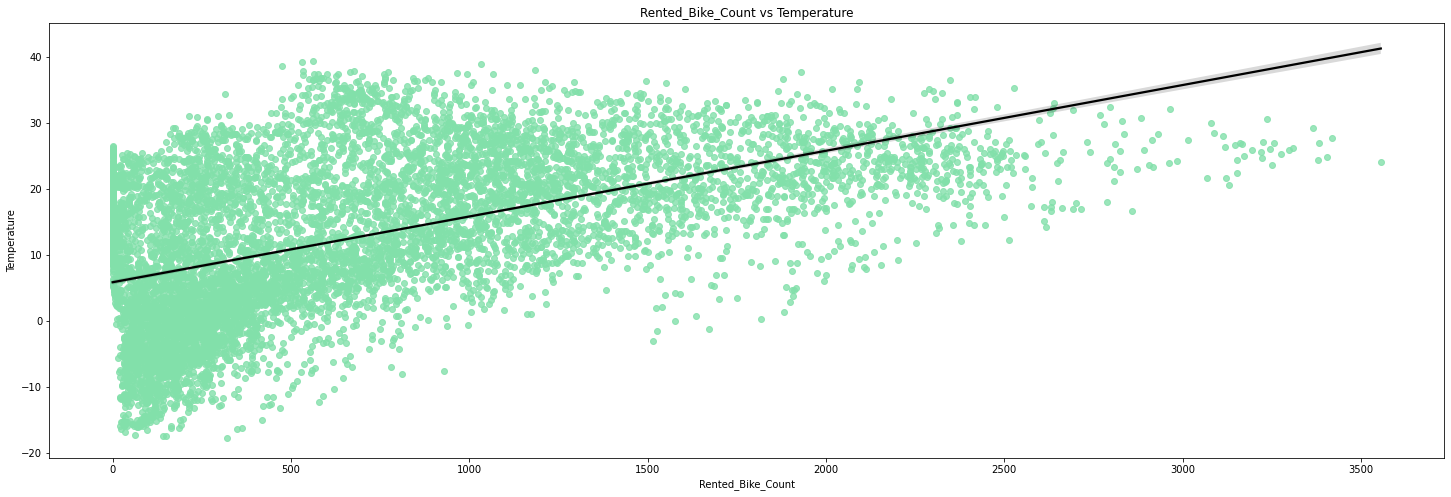

In [ ]:
# Effect of temperature on bike renting
c= '#82E0AA'
plt.figure(figsize = (25,8))
sns.regplot(x = df['Rented_Bike_Count'],y = df['Temperature'],color = c,line_kws={"color": "black"})
plt.title("Rented_Bike_Count vs Temperature") 

- If it is very cold then people will prefare to travel with cars, same if its to hot. for moderate temperature people prefare bike

Text(0.5, 1.0, 'Rented_Bike_Count vs Humidity')

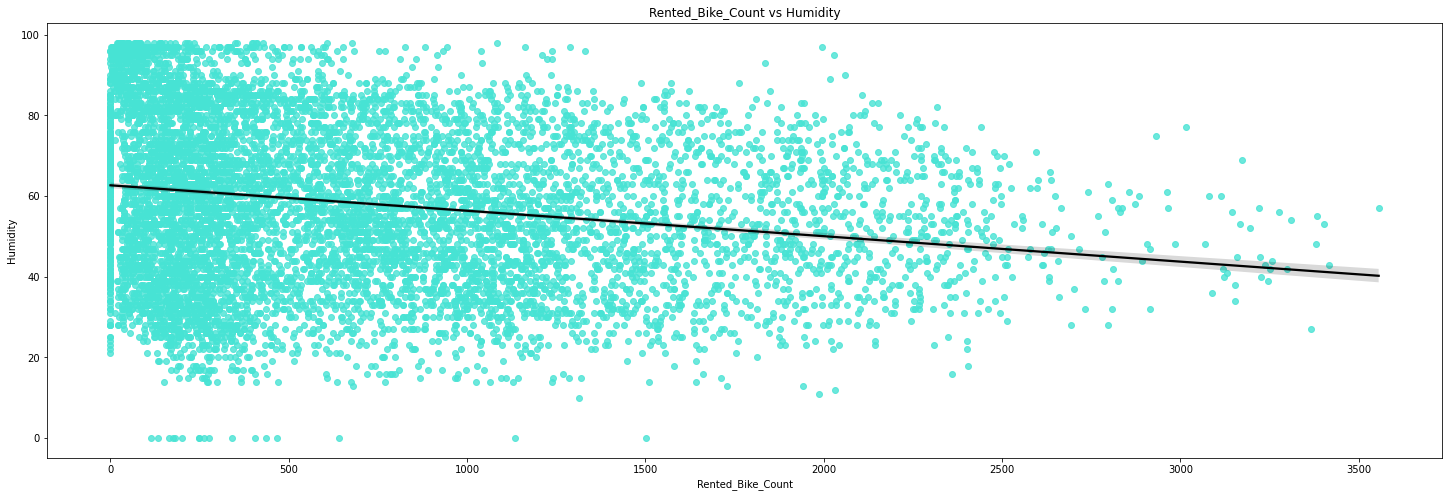

In [ ]:
# Effect of Humidity on bike renting
c= '#47E3D4'
plt.figure(figsize = (25,8))
sns.regplot(x = df['Rented_Bike_Count'],y = df['Humidity'],color = c,line_kws={"color": "black"})
plt.title("Rented_Bike_Count vs Humidity") 

- AS Humidity increase renting of bikes goes down

Text(0.5, 1.0, 'Rented_Bike_Count vs Visibility')

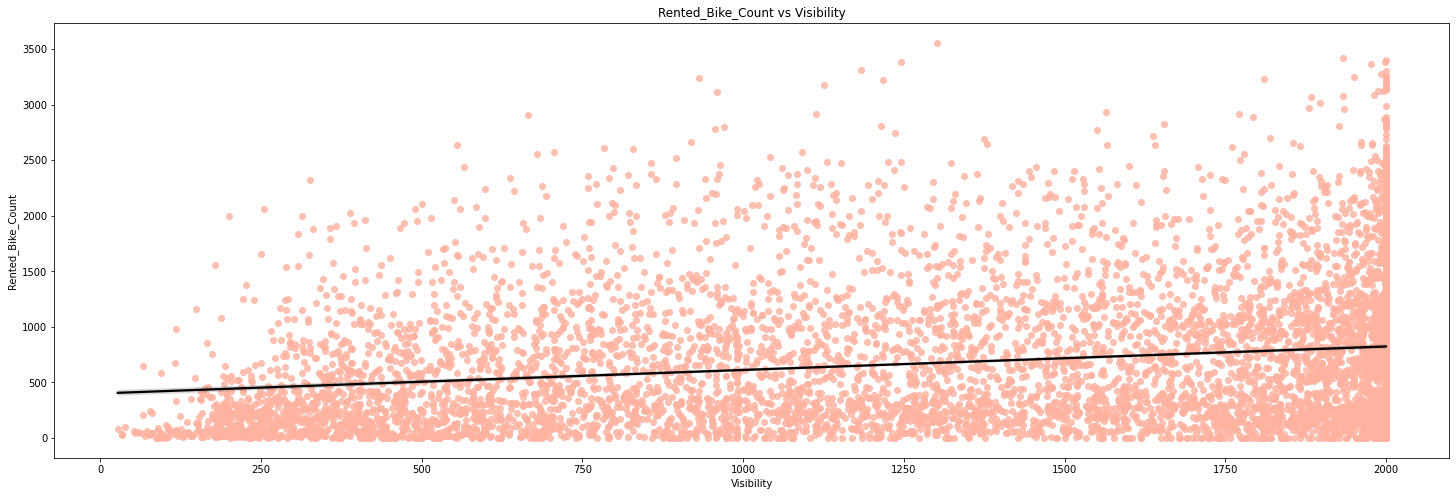

In [ ]:
# Effect of Visibility on bike renting
c= '#FFB29F'
plt.figure(figsize = (25,8))
sns.regplot(x = df['Visibility'],y = df['Rented_Bike_Count'],color = c,line_kws={"color": "black"})
plt.title("Rented_Bike_Count vs Visibility") 

- As visbility increase rented bike count increases

Text(0.5, 1.0, 'Rented_Bike_Count vs Rainfall')

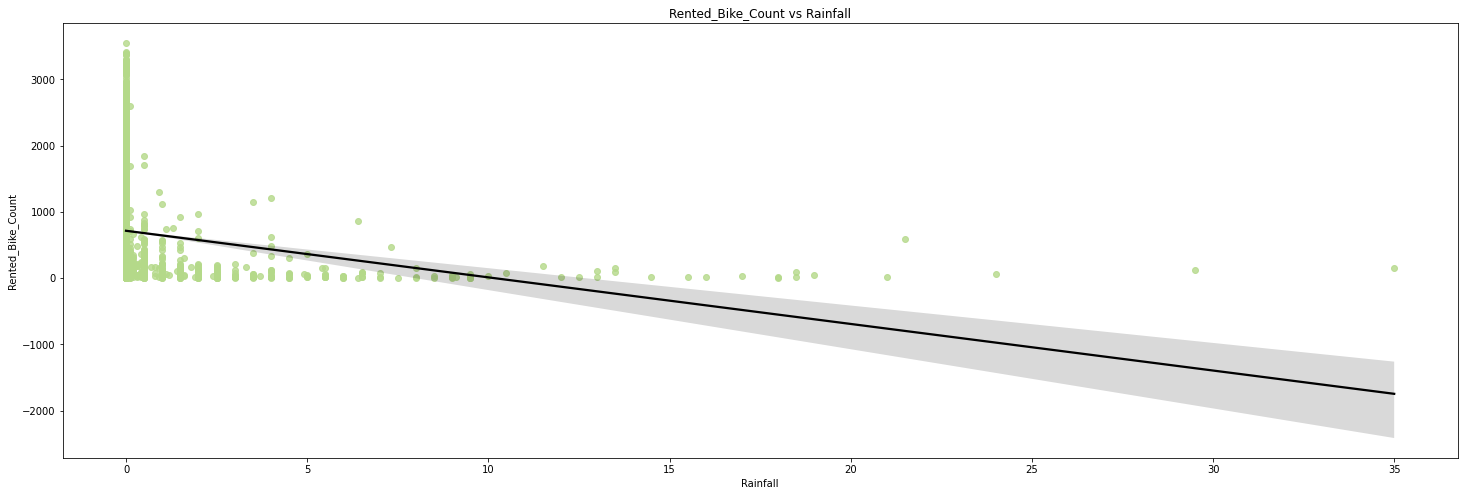

In [ ]:
# Effect of Rainfall on bike renting
c= '#B4D989'
plt.figure(figsize = (25,8))
sns.regplot(x = df['Rainfall'],y = df['Rented_Bike_Count'],color = c,line_kws={"color": "black"})
plt.title("Rented_Bike_Count vs Rainfall") 

- If rainfall then renting bike is not prefared

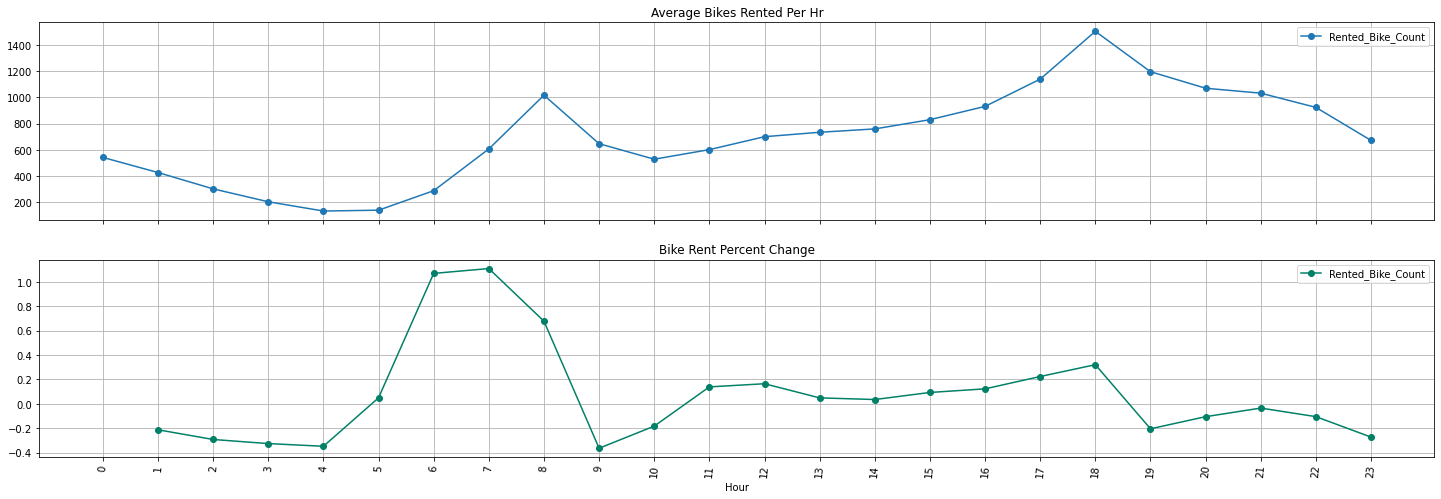

In [ ]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(25,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)
ax1.grid()
# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
ax2.grid()
#ax1.set_xticks(range(len(avg_rent_hrs)))

In [ ]:
df.columns


Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'year'],
      dtype='object')

## Data Preparation

In [ ]:
#Converting Contionus variable to categorical variable for ease in prediction
df['IsVisibility']=df['Visibility'].apply(lambda x: 1 if x>=2000 else 0)
df['IsRainfall']=df['Rainfall'].apply(lambda x:1 if x>=0.148687 else 0)
df['IsSnowfall']=df['Snowfall'].apply(lambda x:1 if x>=0.075068 else 0)
df['IsSolar_Radiation']=df['Solar_Radiation'].apply(lambda x:1 if x>=0.56911 else 0)

#Mapping the Variables
df['Functioning_Day']=df['Functioning_Day'].map({'Yes':1,'No':0})
df['IsHoliday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
df.drop(['Date','Visibility','Rainfall','Snowfall','Solar_Radiation','Holiday'],axis=1,inplace=True)

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Dew_point_temperature,Seasons,Functioning_Day,year,IsVisibility,IsRainfall,IsSnowfall,IsSolar_Radiation,IsHoliday
0,254,0,-5.2,37,2.2,-17.6,Winter,1,2017,1,0,0,0,0
1,204,1,-5.5,38,0.8,-17.6,Winter,1,2017,1,0,0,0,0
2,173,2,-6.0,39,1.0,-17.7,Winter,1,2017,1,0,0,0,0
3,107,3,-6.2,40,0.9,-17.6,Winter,1,2017,1,0,0,0,0
4,78,4,-6.0,36,2.3,-18.6,Winter,1,2017,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,-10.3,Autumn,1,2018,0,0,0,0,0
8756,764,20,3.4,37,2.3,-9.9,Autumn,1,2018,1,0,0,0,0
8757,694,21,2.6,39,0.3,-9.9,Autumn,1,2018,0,0,0,0,0
8758,712,22,2.1,41,1.0,-9.8,Autumn,1,2018,0,0,0,0,0


In [ ]:
df.shape

(8760, 14)

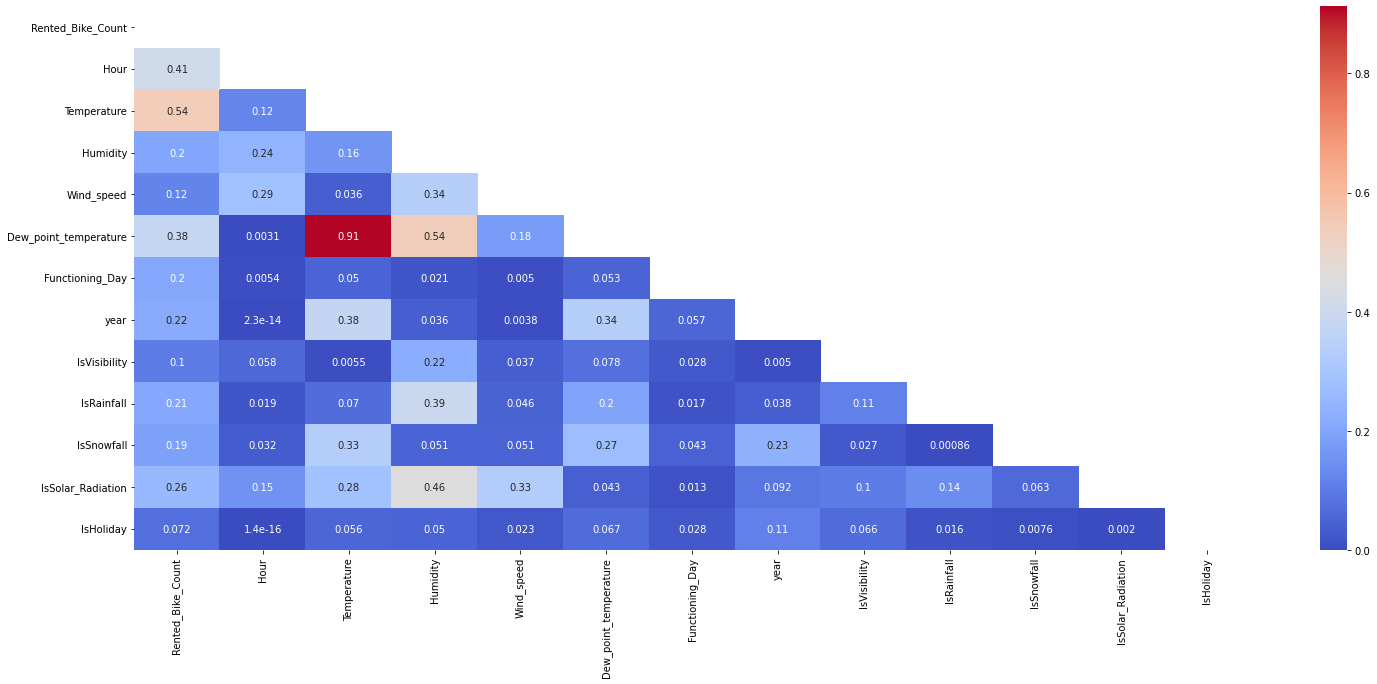

In [ ]:
plt.figure(figsize=(25,10))
cor=df.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')

From the above graph, we can see that Temperature and Dew_point_temperature is highy correlated, keeping the factor of 0.91 . And, then we have hour in the graph which is having good correlation with our dependent variable.

In [ ]:
# Dropping highly corrleated independent features
# Data for all the independent variables
df.drop(labels='Dew_point_temperature',axis=1,inplace = True)

In [ ]:
Seasons=pd.get_dummies(df['Seasons'],drop_first=True)

In [ ]:
final_df=df.append(Seasons)

In [ ]:
final_df.fillna(0,inplace=True)
final_df.drop('Seasons',axis=1,inplace=True)

In [ ]:
final_df.isnull().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Functioning_Day      0
year                 0
IsVisibility         0
IsRainfall           0
IsSnowfall           0
IsSolar_Radiation    0
IsHoliday            0
Spring               0
Summer               0
Winter               0
dtype: int64

In [ ]:
final_df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Functioning_Day,year,IsVisibility,IsRainfall,IsSnowfall,IsSolar_Radiation,IsHoliday,Spring,Summer,Winter
0,254.0,0.0,-5.2,37.0,2.2,1.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204.0,1.0,-5.5,38.0,0.8,1.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,173.0,2.0,-6.0,39.0,1.0,1.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,107.0,3.0,-6.2,40.0,0.9,1.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,4.0,-6.0,36.0,2.3,1.0,2017.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [ ]:
X=final_df.drop('Rented_Bike_Count',axis=1)
y=final_df['Rented_Bike_Count']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def predict(ml_model,X,y):
  # Train Test Split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)

    # Scaling the features
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)

    # Model Training
    model=ml_model.fit(X_train,y_train)

    # Prediction on test dataset
    y_pred=model.predict(X_test)

    #Scatter plot of prediction vs actual
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Printing Evaluation Metrics
    print('R2 : ', r2_score(y_test, y_pred))

    MSE  = mean_squared_error(y_test, y_pred)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    MAE  = mean_absolute_error(y_test, y_pred)
    print("MAE :" , MAE)
    
    # Line Plot
    plt.figure(figsize=(15,10))
    plt.plot(y_pred)
    plt.plot(np.array(y_test))
    plt.legend(["Predicted","Actual"])
    plt.xlabel('No of Test Data')
    plt.show()
    
    

R2 :  0.7116179251524515
MSE : 98951.96810963372
RMSE : 314.56631750655333
MAE : 161.3547872967012


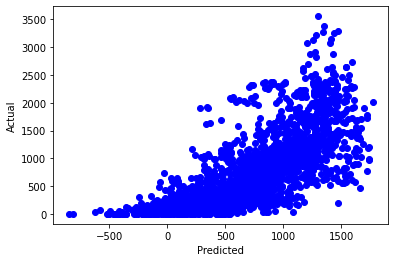

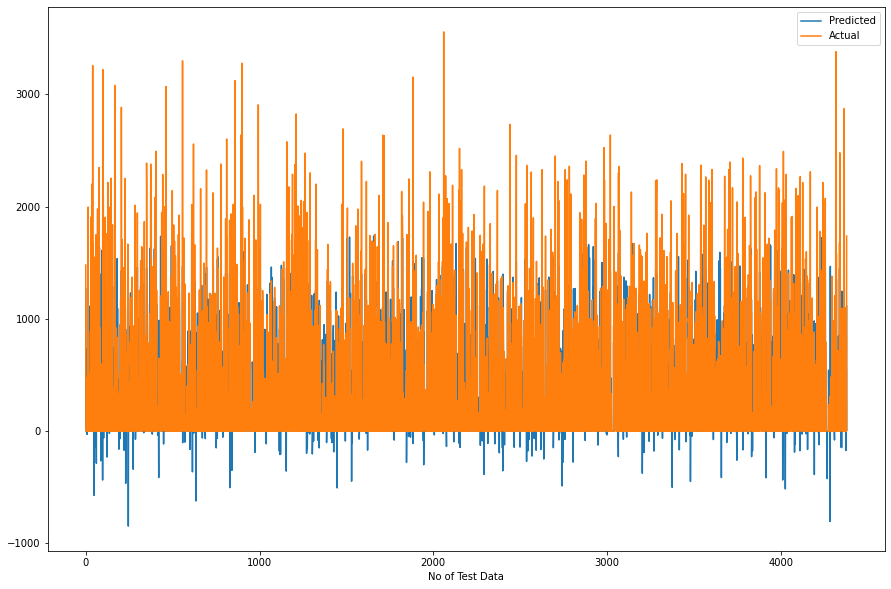

In [ ]:
predict(LinearRegression(),X,y)   

R2 :  0.8046227669974243
MSE : 67039.40159817351
RMSE : 258.91968175125953
MAE : 109.23493150684932


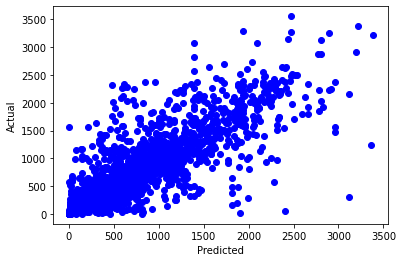

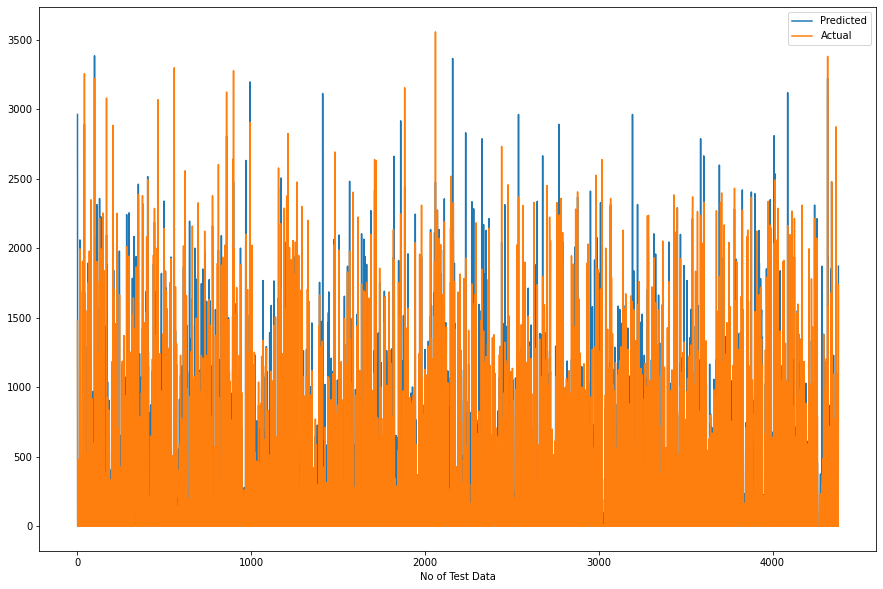

In [ ]:
predict(DecisionTreeRegressor(),X,y)

R2 :  0.9008277966290384
MSE : 34028.761012671224
RMSE : 184.46886190539374
MAE : 81.1473904109589


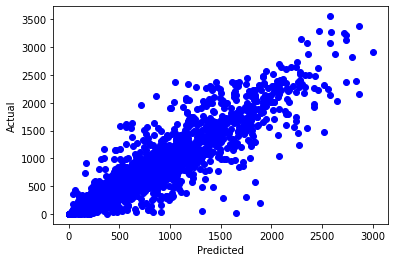

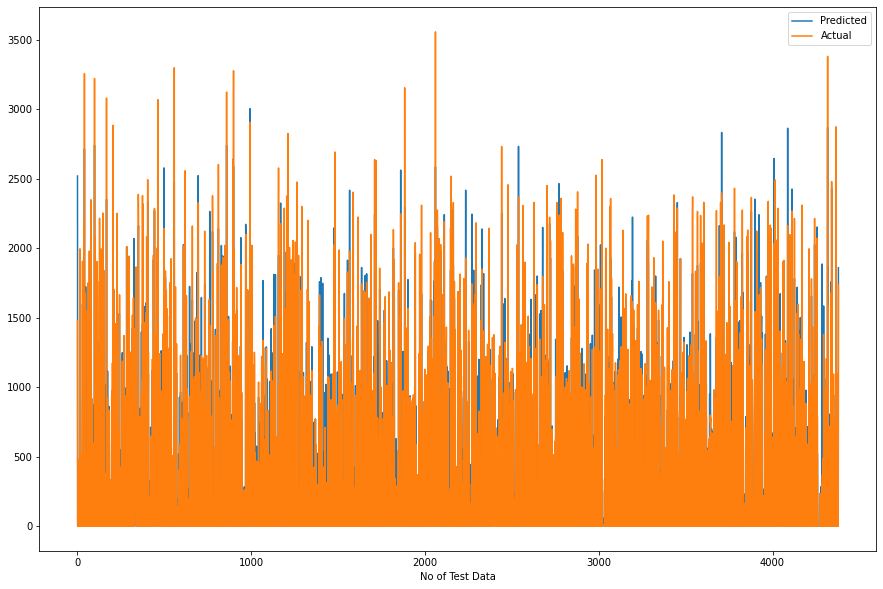

In [ ]:
predict(RandomForestRegressor(),X,y)

R2 :  0.8849183080408551
MSE : 39487.752207774916
RMSE : 198.71525408929963
MAE : 95.00784948650127


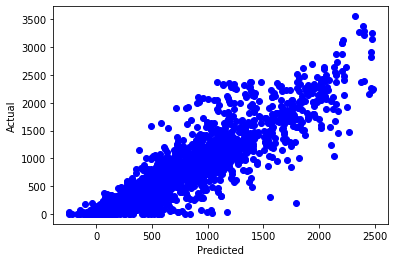

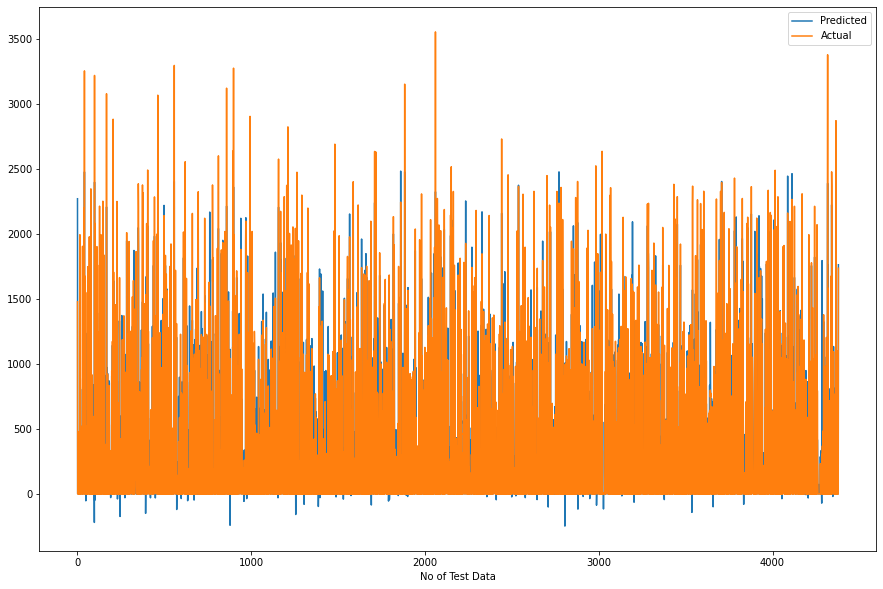

In [ ]:
predict(GradientBoostingRegressor(),X,y)

In [ ]:
import xgboost as xgb

[21:48:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 :  0.9065646649396117
MSE : 32060.280792750764
RMSE : 179.05384886327008
MAE : 81.87728899874507


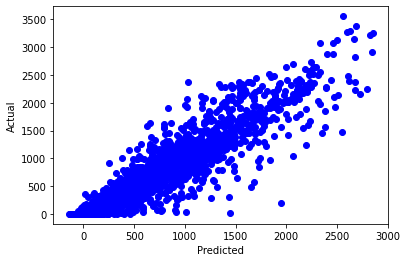

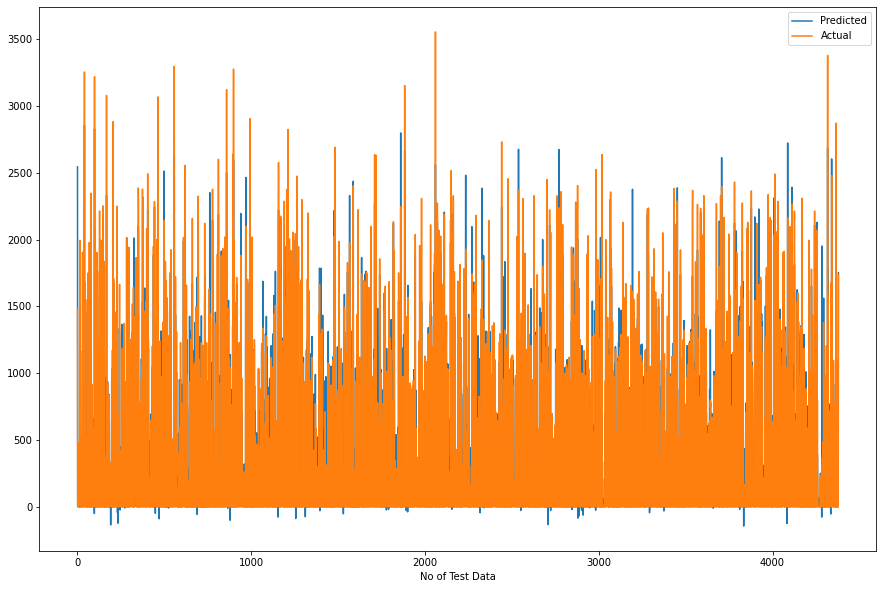

In [ ]:
predict(xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1),X,y)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [ ]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[21:51:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:21] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 10,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
reg_optimal_model =reg_gs.best_estimator_

[21:53:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 :  0.9065646649396117
MSE : 32060.280792750764
RMSE : 179.05384886327008
MAE : 81.87728899874507


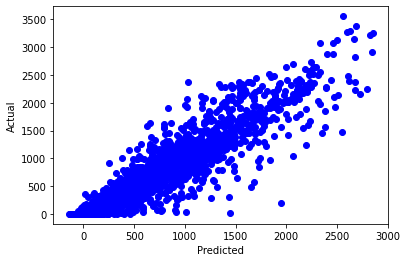

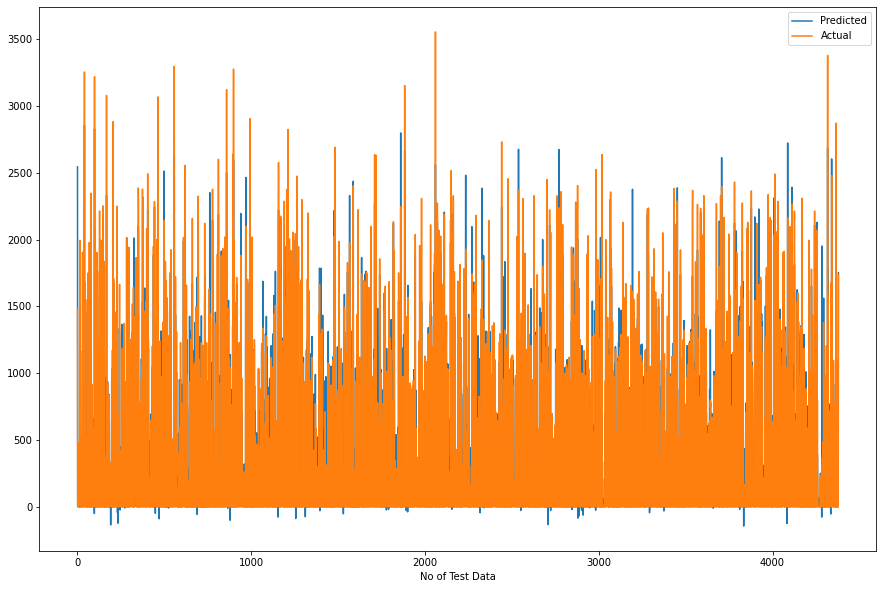

In [ ]:
predict(reg_optimal_model,X,y)